###                Real State project 

                 
                 

Description ABout Project:

Our client is a real estate business Agency.

they have some brokers who are giving estimations for buy or sell a property.

Currently they are the average error thery are facing is 70K $, in their transactions.

They approached us to design a model to predict the price of a property with grater performnmace then their existed system.

notes:

What we need to deliver -> A model which is trained and it can able to replace their broker system.

What type of machine Learning Task it is ?

Target variable : Transactional Price

Win condition: Avg.Error < 70k $

Meta Data: Information about information

Total Observations:

1. 1883 recods
2. Each row is one property details
3. 200 K $  to 800 K $

Steps:

       1. Exploratory Data Analysis
               : "To learn from the data, first we need to know about it"

       2. Data Cleaning
               : Better and cleaned data will give best results

       3. Feature Engineering
               : 

       4. Algorithms (Regression/Classification)



       5. MOdel Training


### 1. Exploring Data

#Stage in EDA
#1. Basic Information
#2.Numberical Distribution
#3.Categorical Distribution
#4.Segmentation



### 1.Basic Information

In [1]:
# import pandas in environment 
import pandas as pd

# import numpy in environment 
import numpy as np

# import Matplotlib in environment for ploting 

import matplotlib.pyplot as plt

#import seanborn for static ploting 

import seaborn as sns

# for view maximum coulms 
pd.set_option('display.max_columns',100)

In [57]:
# import training data in environment 
data=pd.read_csv('real_estate_data.csv')

In [8]:
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
tx_price              1883 non-null int64
beds                  1883 non-null int64
baths                 1883 non-null int64
sqft                  1883 non-null int64
year_built            1883 non-null int64
lot_size              1883 non-null int64
property_type         1883 non-null object
exterior_walls        1660 non-null object
roof                  1529 non-null object
basement              1657 non-null float64
restaurants           1883 non-null int64
groceries             1883 non-null int64
nightlife             1883 non-null int64
cafes                 1883 non-null int64
shopping              1883 non-null int64
arts_entertainment    1883 non-null int64
beauty_spas           1883 non-null int64
active_life           1883 non-null int64
median_age            1883 non-null float64
married               1883 non-null float64
college_grad          1883 non-null float64


In [10]:
data.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [14]:
# for describe all object value
(data=='object').describe()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883,1883


In [15]:
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [16]:
data.shape

(1883, 26)

### The purpose of Example Observations
Do the columns make sense?

Do the values in teh columns make sense?

Are the values on the right scale or not?

Is missing data going to be a problem for our things?

What type of classess are there in our categorical data?

In [30]:
# Filter and dispaly only data tpyes that are objects
data.dtypes[data.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [28]:
# Though loop finding Catecorical data
for i in data.dtypes[data.dtypes=='object'].index:
    print(i)

property_type
exterior_walls
roof


In [33]:
# for observing 100 row 
pd.set_option('display.max_rows',200)

In [34]:
data

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


In [38]:
# Identifing the unique 
data.nunique()

tx_price               888
beds                     5
baths                    6
sqft                  1307
year_built              94
lot_size               763
property_type            2
exterior_walls          16
roof                    16
basement                 1
restaurants            177
groceries               25
nightlife               47
cafes                   44
shopping               194
arts_entertainment      31
beauty_spas            116
active_life             81
median_age              40
married                 85
college_grad            83
property_tax           555
insurance              251
median_school           16
num_schools              4
tx_year                 24
dtype: int64

In [40]:
# finding Total null data
data.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

# OBSERVATION       NAN DATA
exterior_walls                  223

roof                            354

basement                        226

### 2..Numberical Distribution

Importent - ploting the distributions of the feature

1. What to look for in the distributions

    a. Distributions that are un expected.
        1. very low , can not be -ve, too high
        2. cannot be 0 or not 10

    b. Potential outliers that dont make sense


    c.Sparse data


    d.Features that should be in Binary

    e. Boundaries that don't make sense
        1. 0-100%

    f. Potential Measurment errors

### Pandas Histrogram Grid

Pandas come with hist() function that plot the distribution of all the numbertic feature in ince grid.

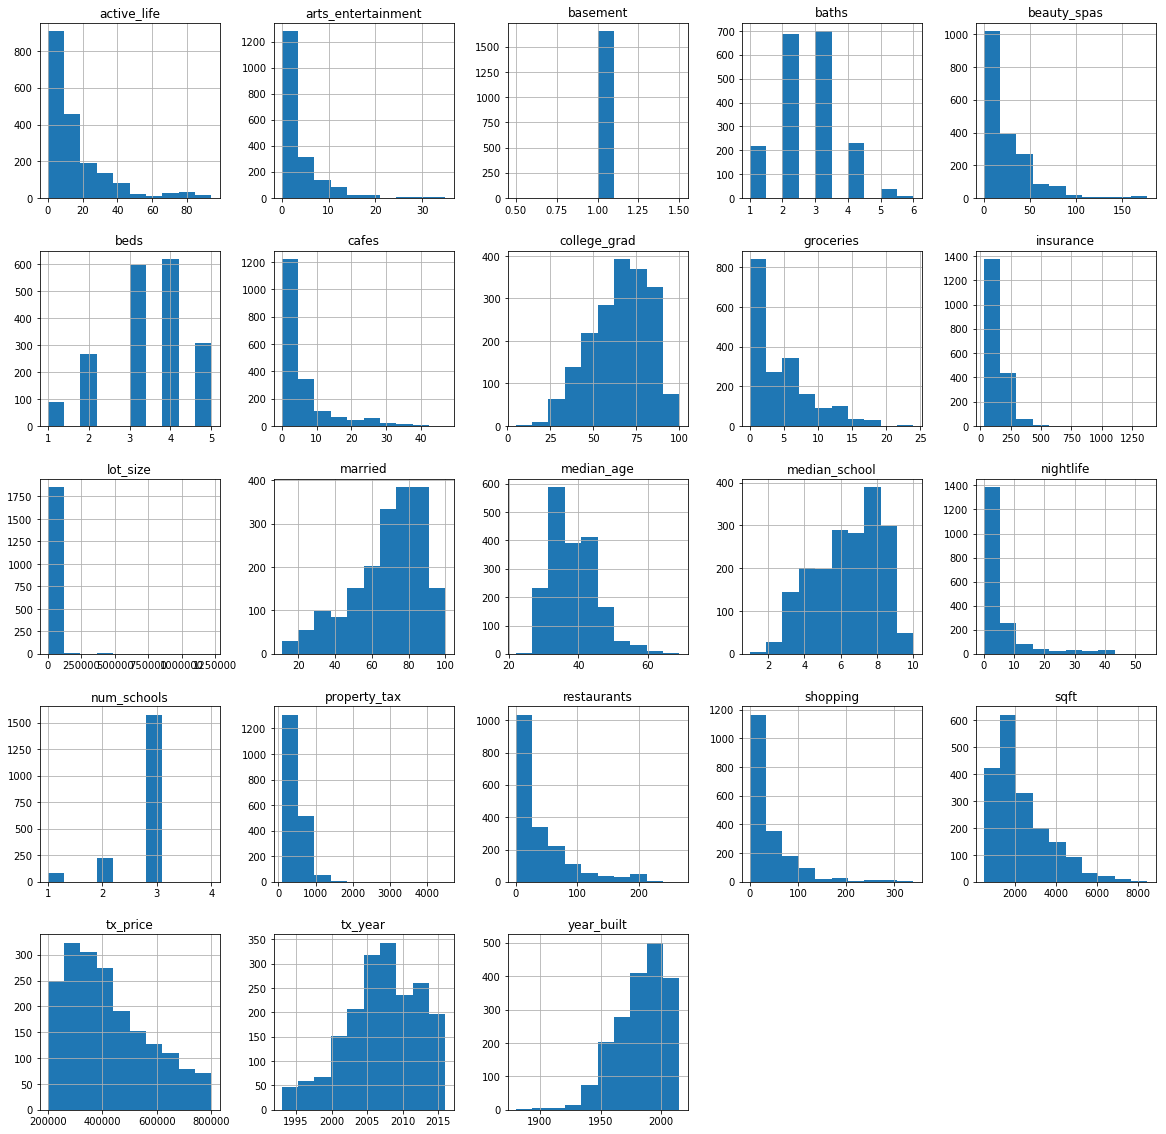

In [46]:
data.hist(figsize=(20,20))
plt.show()

In [49]:
# Describe all numberical features
data.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [68]:
# Describe all categorical features
data.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


In [57]:
# its showing only numbericaL columns
(data.describe()).columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'basement', 'restaurants', 'groceries', 'nightlife', 'cafes',
       'shopping', 'arts_entertainment', 'beauty_spas', 'active_life',
       'median_age', 'married', 'college_grad', 'property_tax', 'insurance',
       'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [58]:
# it showing all columns
data.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

### 3.Distribution of categorical feature

In [69]:
# Summerize cetegorical features
data.describe(include='object')

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


In [70]:
data.shape

(1883, 26)

In [73]:
data.property_type.value_counts()

Single-Family                    1080
Apartment / Condo / Townhouse     803
Name: property_type, dtype: int64

In [75]:
data.property_type.isnull().sum()

0

In [79]:
data.exterior_walls.value_counts()	

Brick                  687
Siding (Alum/Vinyl)    503
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Concrete Block           7
Block                    7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

### Seaborn Count PLot

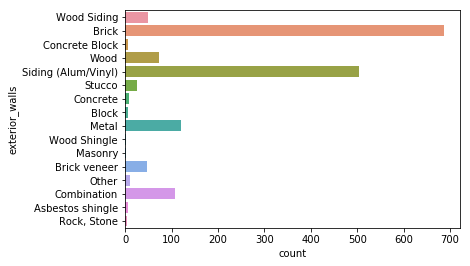

In [81]:
# Bar plot for Eterior walls
sns.countplot(y='exterior_walls',data=data)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


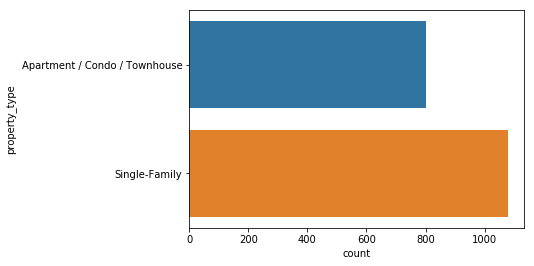

AxesSubplot(0.125,0.125;0.775x0.755)


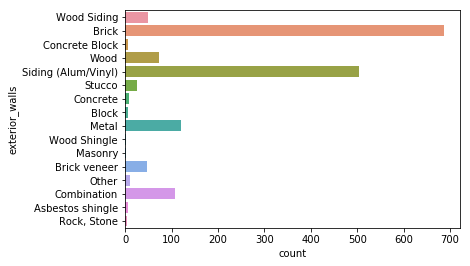

AxesSubplot(0.125,0.125;0.775x0.755)


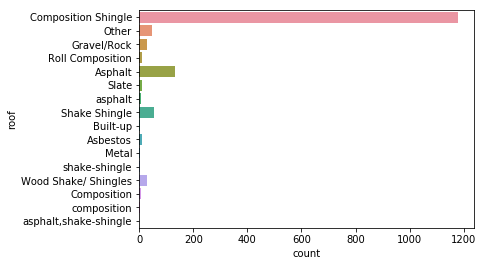

In [84]:
for i in data.dtypes[data.dtypes=='object'].index:
    print(sns.countplot(y=i,data=data))
    plt.show()

### 4. Segmentations

segmentation are very powerful way to cut the data to observe the relationship between categorical and nuberical features.

property_type vs tx_price AxesSubplot(0.125,0.125;0.775x0.755)


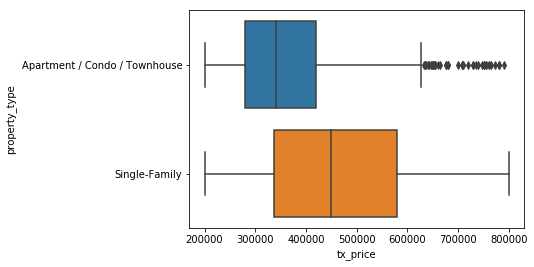

property_type vs beds AxesSubplot(0.125,0.125;0.775x0.755)


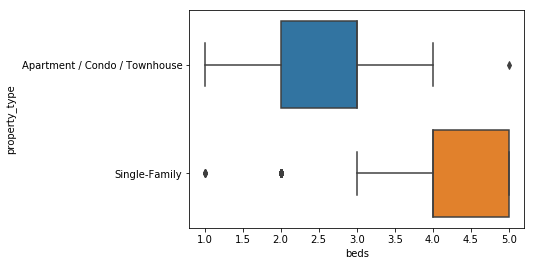

property_type vs baths AxesSubplot(0.125,0.125;0.775x0.755)


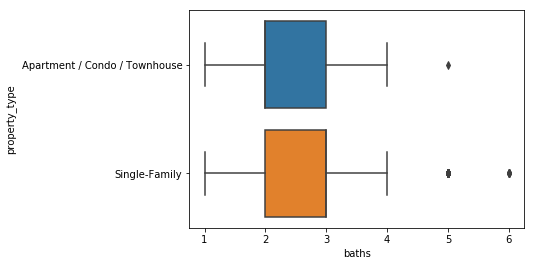

property_type vs sqft AxesSubplot(0.125,0.125;0.775x0.755)


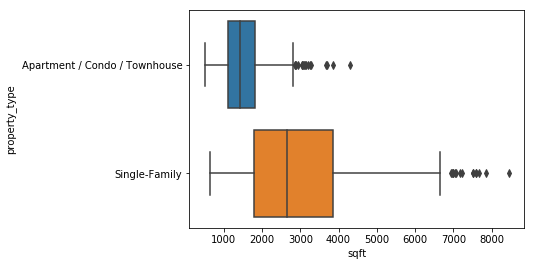

property_type vs year_built AxesSubplot(0.125,0.125;0.775x0.755)


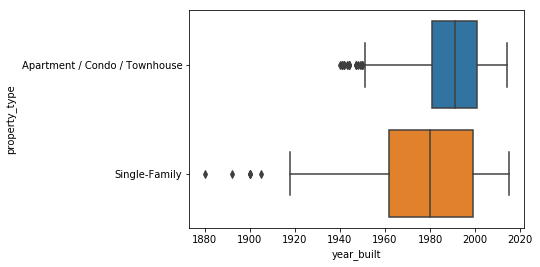

property_type vs lot_size AxesSubplot(0.125,0.125;0.775x0.755)


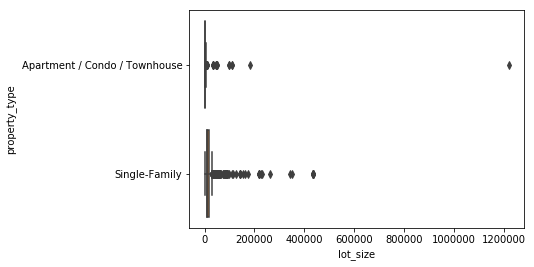

property_type vs basement AxesSubplot(0.125,0.125;0.775x0.755)


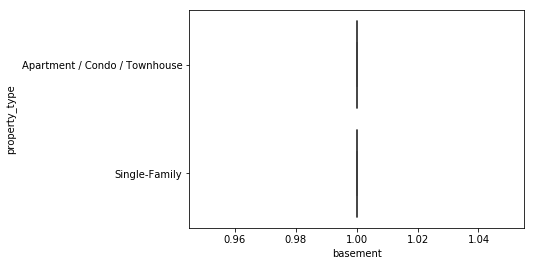

property_type vs restaurants AxesSubplot(0.125,0.125;0.775x0.755)


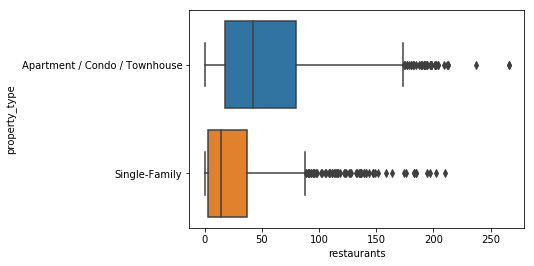

property_type vs groceries AxesSubplot(0.125,0.125;0.775x0.755)


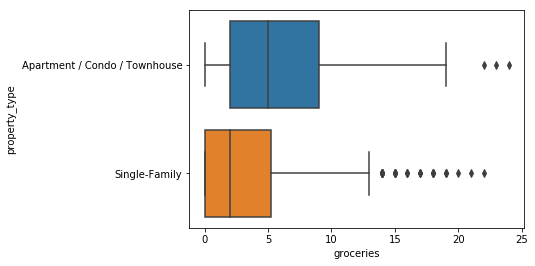

property_type vs nightlife AxesSubplot(0.125,0.125;0.775x0.755)


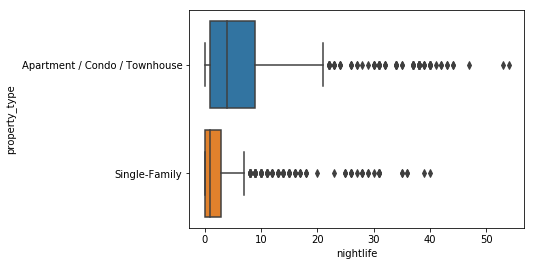

property_type vs cafes AxesSubplot(0.125,0.125;0.775x0.755)


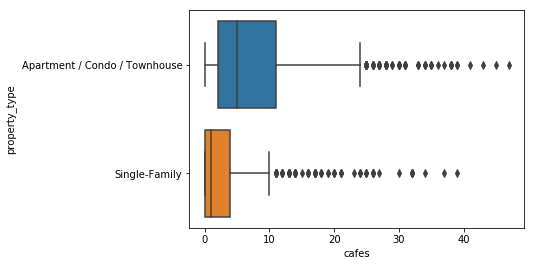

property_type vs shopping AxesSubplot(0.125,0.125;0.775x0.755)


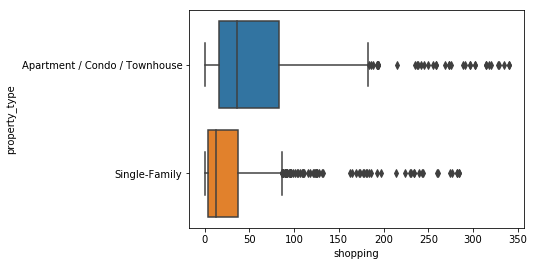

property_type vs arts_entertainment AxesSubplot(0.125,0.125;0.775x0.755)


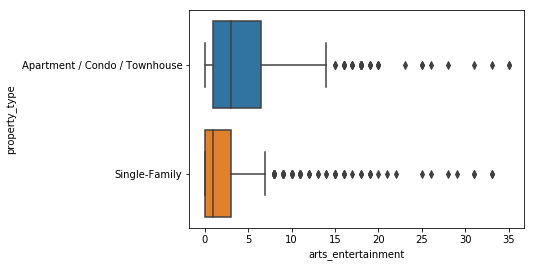

property_type vs beauty_spas AxesSubplot(0.125,0.125;0.775x0.755)


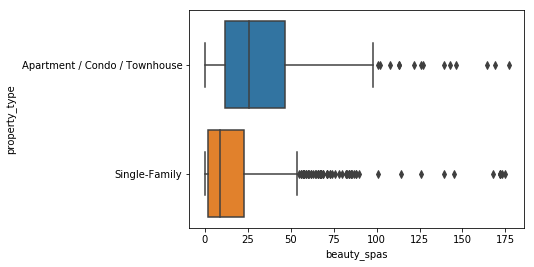

property_type vs active_life AxesSubplot(0.125,0.125;0.775x0.755)


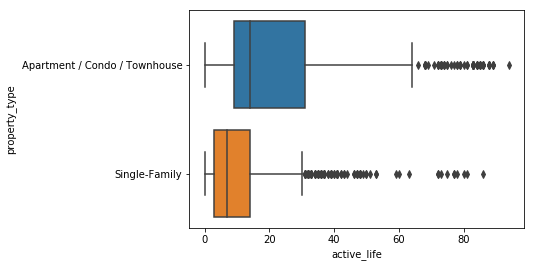

property_type vs median_age AxesSubplot(0.125,0.125;0.775x0.755)


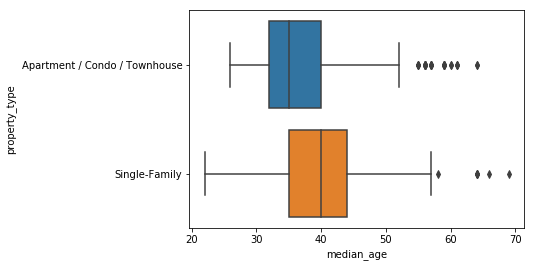

property_type vs married AxesSubplot(0.125,0.125;0.775x0.755)


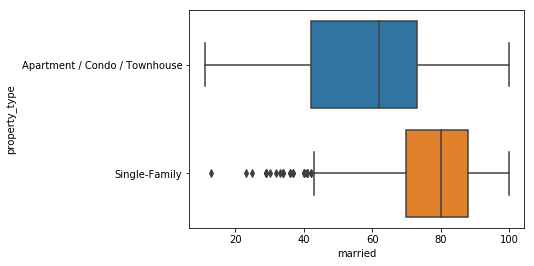

property_type vs college_grad AxesSubplot(0.125,0.125;0.775x0.755)


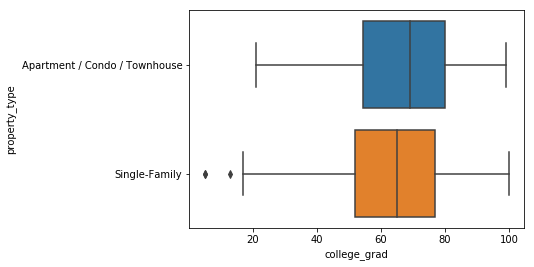

property_type vs property_tax AxesSubplot(0.125,0.125;0.775x0.755)


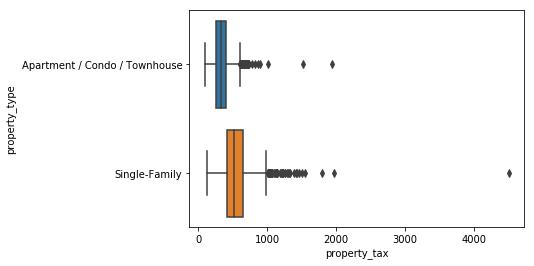

property_type vs insurance AxesSubplot(0.125,0.125;0.775x0.755)


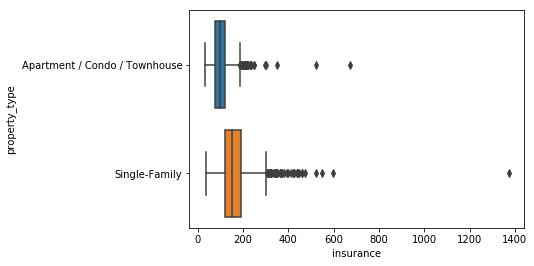

property_type vs median_school AxesSubplot(0.125,0.125;0.775x0.755)


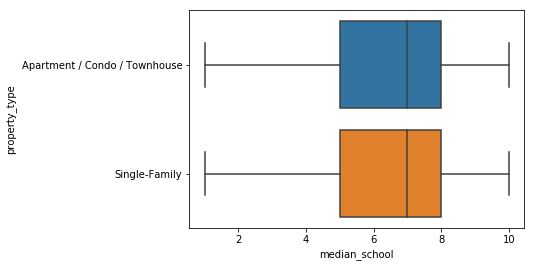

property_type vs num_schools AxesSubplot(0.125,0.125;0.775x0.755)


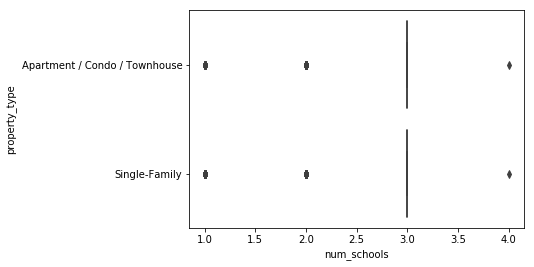

property_type vs tx_year AxesSubplot(0.125,0.125;0.775x0.755)


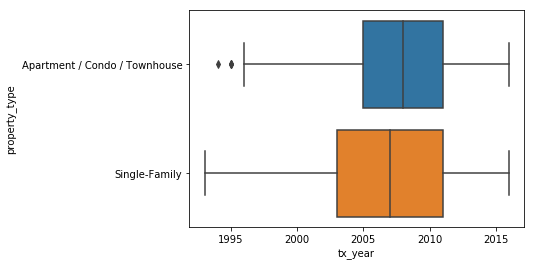

exterior_walls vs tx_price AxesSubplot(0.125,0.125;0.775x0.755)


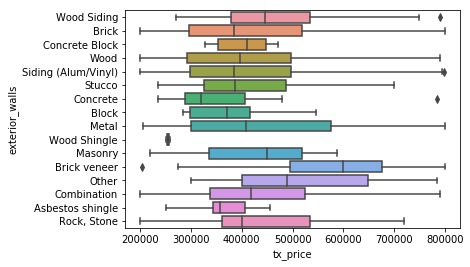

exterior_walls vs beds AxesSubplot(0.125,0.125;0.775x0.755)


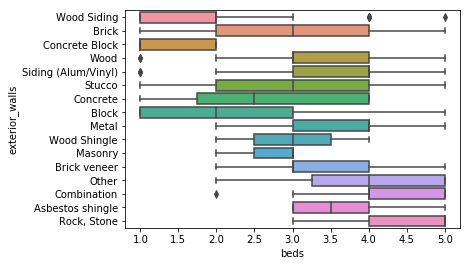

exterior_walls vs baths AxesSubplot(0.125,0.125;0.775x0.755)


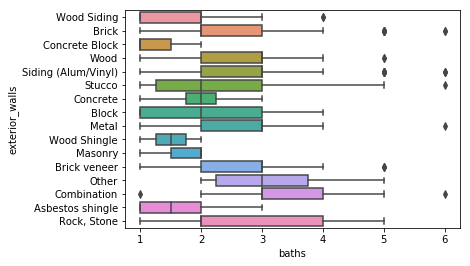

exterior_walls vs sqft AxesSubplot(0.125,0.125;0.775x0.755)


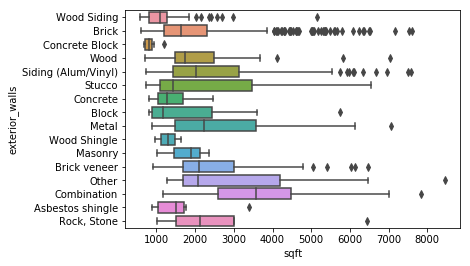

exterior_walls vs year_built AxesSubplot(0.125,0.125;0.775x0.755)


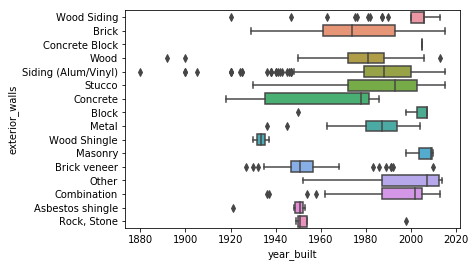

exterior_walls vs lot_size AxesSubplot(0.125,0.125;0.775x0.755)


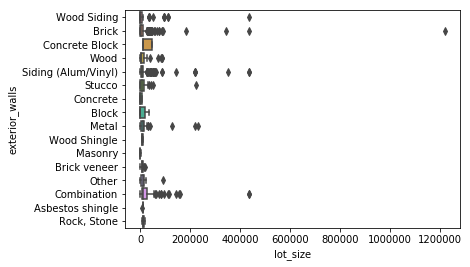

exterior_walls vs basement AxesSubplot(0.125,0.125;0.775x0.755)


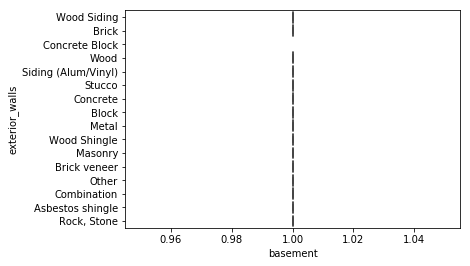

exterior_walls vs restaurants AxesSubplot(0.125,0.125;0.775x0.755)


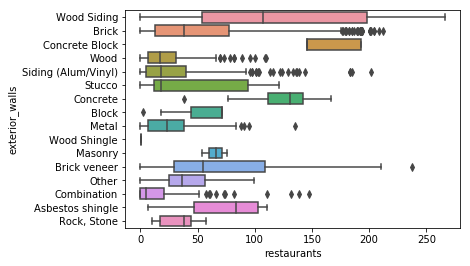

exterior_walls vs groceries AxesSubplot(0.125,0.125;0.775x0.755)


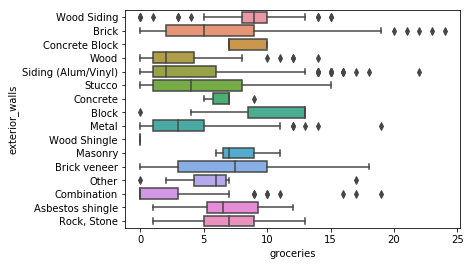

exterior_walls vs nightlife AxesSubplot(0.125,0.125;0.775x0.755)


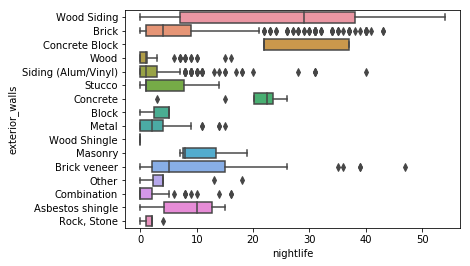

exterior_walls vs cafes AxesSubplot(0.125,0.125;0.775x0.755)


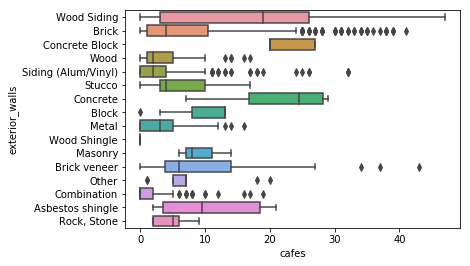

exterior_walls vs shopping AxesSubplot(0.125,0.125;0.775x0.755)


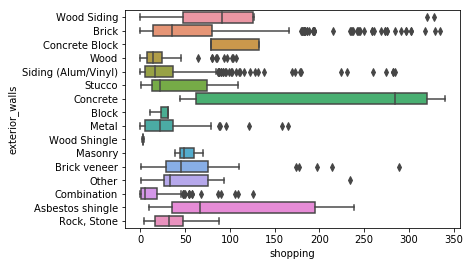

exterior_walls vs arts_entertainment AxesSubplot(0.125,0.125;0.775x0.755)


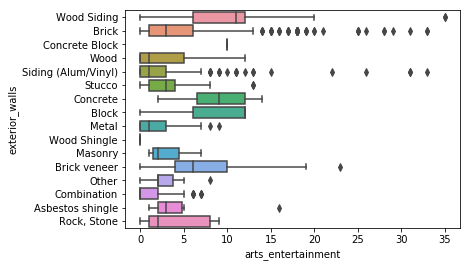

exterior_walls vs beauty_spas AxesSubplot(0.125,0.125;0.775x0.755)


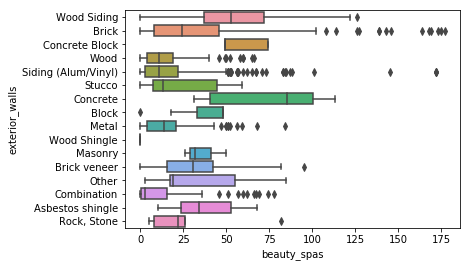

exterior_walls vs active_life AxesSubplot(0.125,0.125;0.775x0.755)


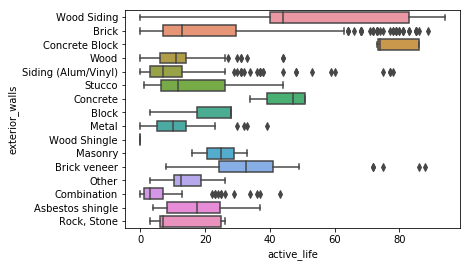

exterior_walls vs median_age AxesSubplot(0.125,0.125;0.775x0.755)


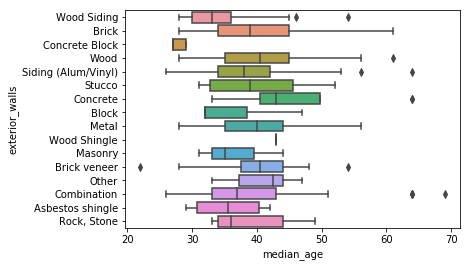

exterior_walls vs married AxesSubplot(0.125,0.125;0.775x0.755)


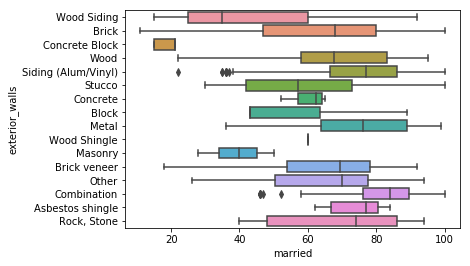

exterior_walls vs college_grad AxesSubplot(0.125,0.125;0.775x0.755)


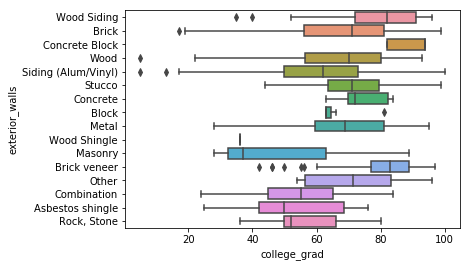

exterior_walls vs property_tax AxesSubplot(0.125,0.125;0.775x0.755)


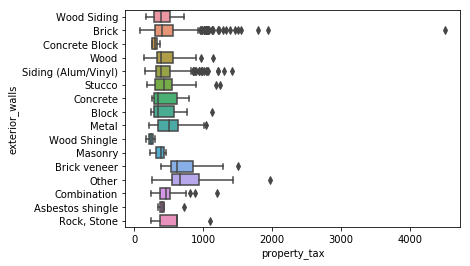

exterior_walls vs insurance AxesSubplot(0.125,0.125;0.775x0.755)


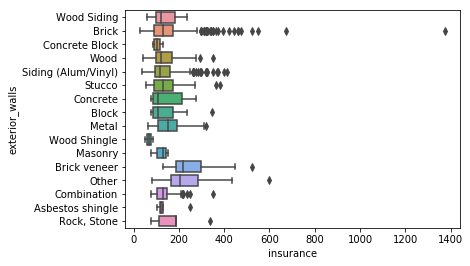

exterior_walls vs median_school AxesSubplot(0.125,0.125;0.775x0.755)


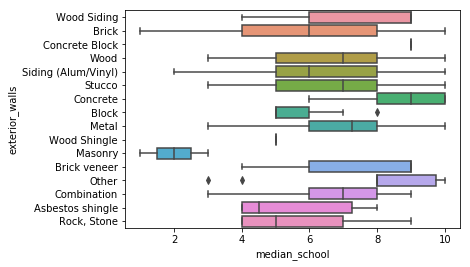

exterior_walls vs num_schools AxesSubplot(0.125,0.125;0.775x0.755)


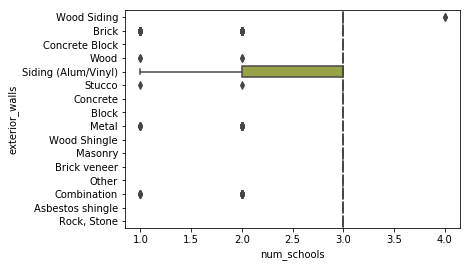

exterior_walls vs tx_year AxesSubplot(0.125,0.125;0.775x0.755)


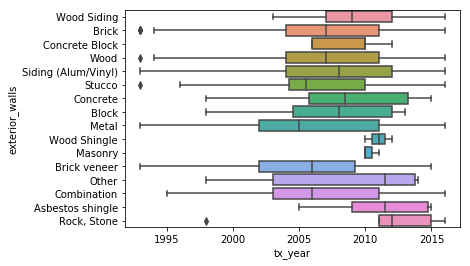

roof vs tx_price AxesSubplot(0.125,0.125;0.775x0.755)


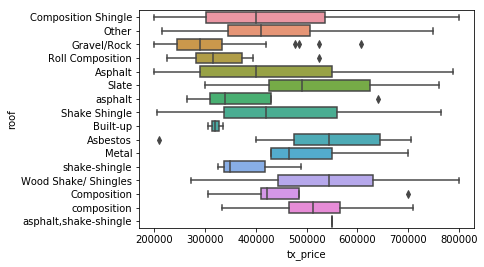

roof vs beds AxesSubplot(0.125,0.125;0.775x0.755)


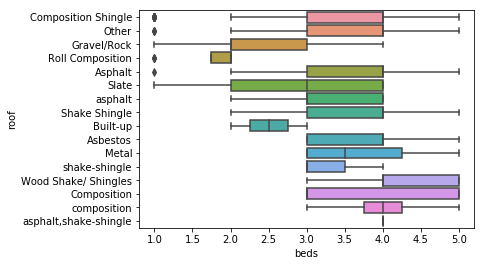

roof vs baths AxesSubplot(0.125,0.125;0.775x0.755)


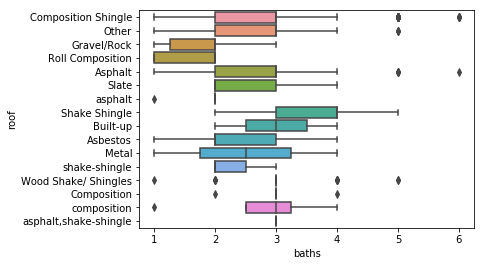

roof vs sqft AxesSubplot(0.125,0.125;0.775x0.755)


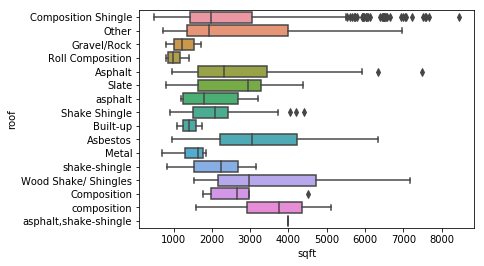

roof vs year_built AxesSubplot(0.125,0.125;0.775x0.755)


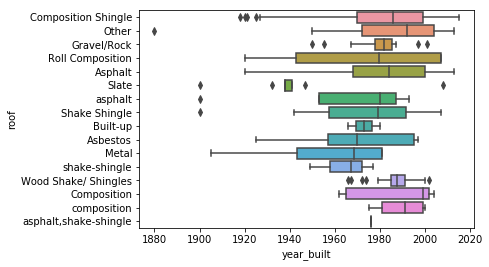

roof vs lot_size AxesSubplot(0.125,0.125;0.775x0.755)


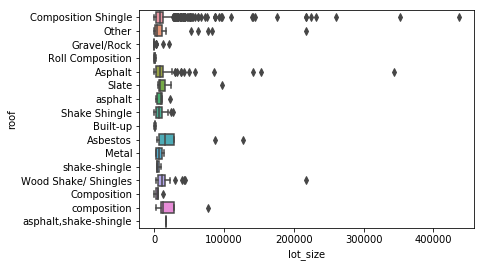

roof vs basement AxesSubplot(0.125,0.125;0.775x0.755)


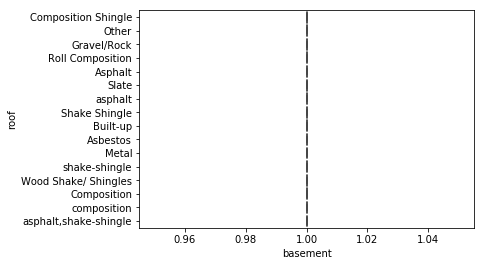

roof vs restaurants AxesSubplot(0.125,0.125;0.775x0.755)


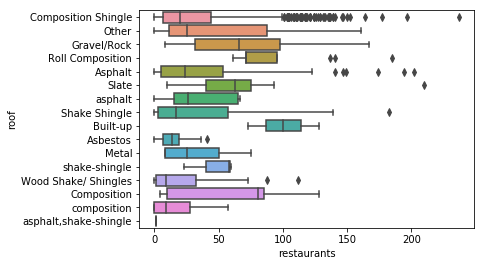

roof vs groceries AxesSubplot(0.125,0.125;0.775x0.755)


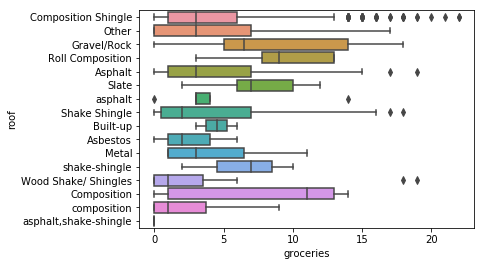

roof vs nightlife AxesSubplot(0.125,0.125;0.775x0.755)


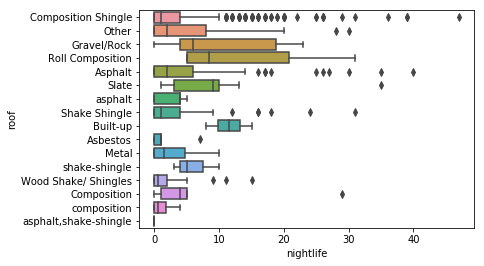

roof vs cafes AxesSubplot(0.125,0.125;0.775x0.755)


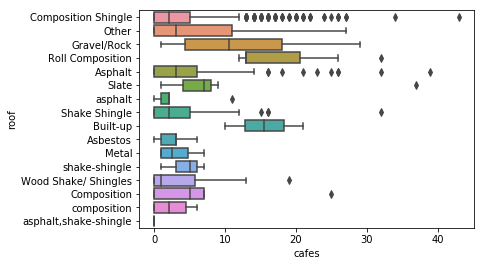

roof vs shopping AxesSubplot(0.125,0.125;0.775x0.755)


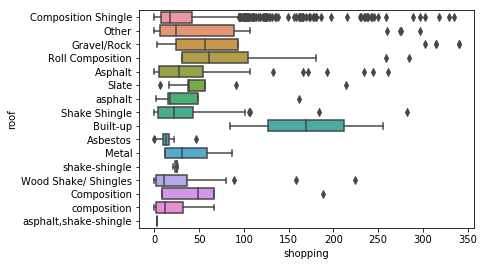

roof vs arts_entertainment AxesSubplot(0.125,0.125;0.775x0.755)


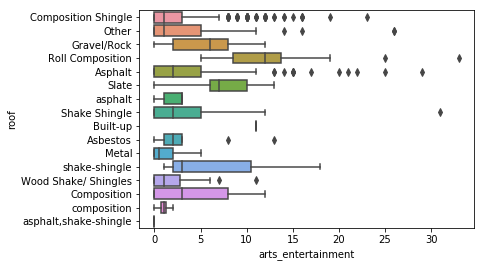

roof vs beauty_spas AxesSubplot(0.125,0.125;0.775x0.755)


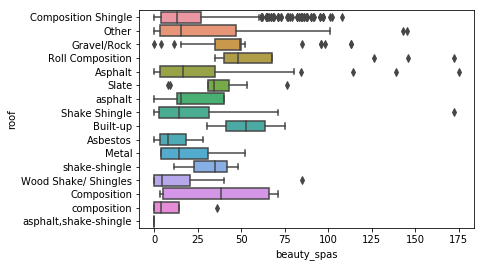

roof vs active_life AxesSubplot(0.125,0.125;0.775x0.755)


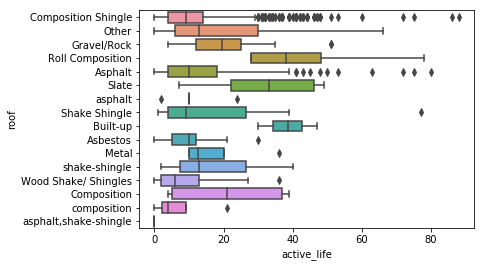

roof vs median_age AxesSubplot(0.125,0.125;0.775x0.755)


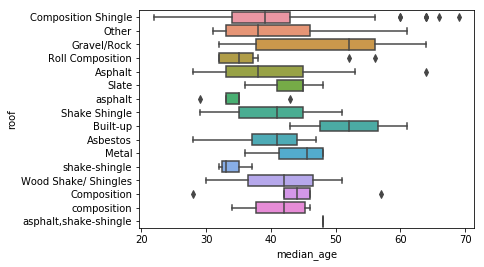

roof vs married AxesSubplot(0.125,0.125;0.775x0.755)


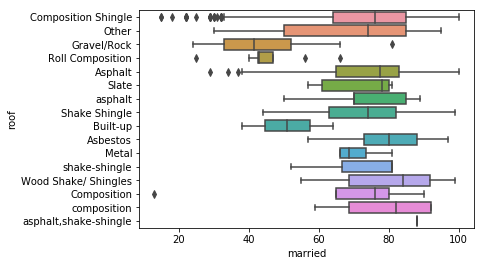

roof vs college_grad AxesSubplot(0.125,0.125;0.775x0.755)


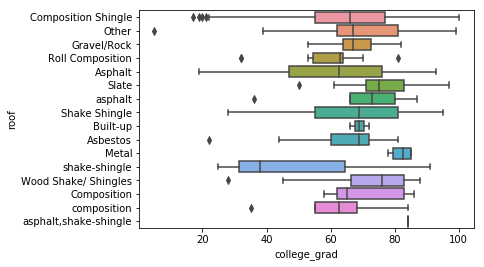

roof vs property_tax AxesSubplot(0.125,0.125;0.775x0.755)


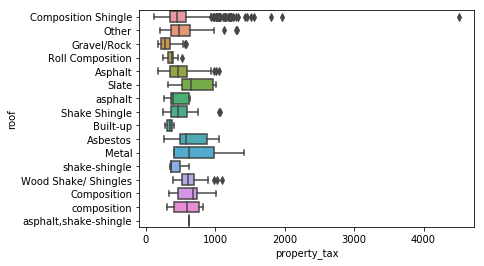

roof vs insurance AxesSubplot(0.125,0.125;0.775x0.755)


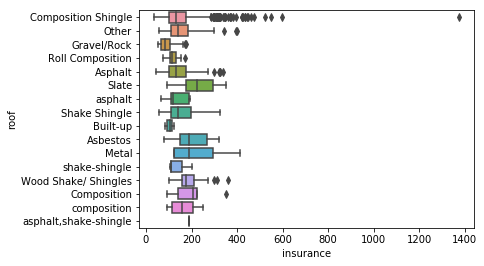

roof vs median_school AxesSubplot(0.125,0.125;0.775x0.755)


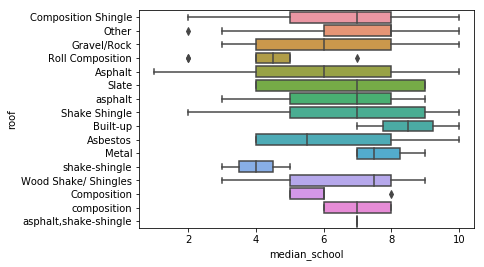

roof vs num_schools AxesSubplot(0.125,0.125;0.775x0.755)


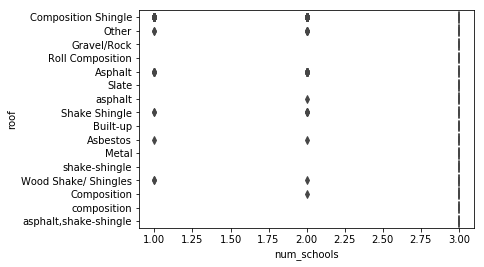

roof vs tx_year AxesSubplot(0.125,0.125;0.775x0.755)


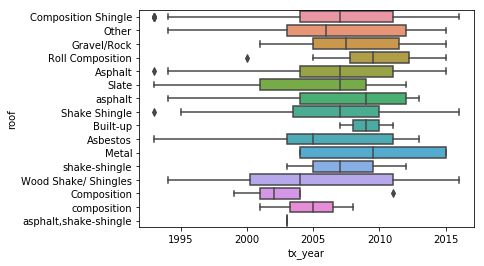

In [14]:
for cat in data.dtypes[data.dtypes=='object'].index:
    for num in data.dtypes[data.dtypes!='object'].index:
        print(cat,'vs',num,sns.boxplot(y=cat,x=num,data=data))
        plt.show()
    

### Group By

In [16]:
# if we want to compare 2 cetegories of propertyt_types ,across many feature
data.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


Observations: 

    1. On average which property is larger?------------>Single-Family

    2. Which type of property has larger lot size?----->Apartment / Condo / Townhouse

    3. More night life ?/restaurants/grosceries?------->Apartment / Condo / Townhouse

    4. Is there any surprizing observations for you?

### Correlation


Correlation: It simple describe about the relation ship between 2 numarical features.

praporational     Inversly Praportanla 
Postive : + /Increase Change in one feature -> +ve/Increase in secoend Feature

     Eg: child's age vs height 
Negetive : 1. +ve -- change 2. -ve -- willbe the change

     Eg: hours spent on studying and number of parties attended



        1. -ve  -- change   2. +ve  -- will be the change

                  -1<= Correlation <=1


           -1,-0.99,-0.8,...........-0.000000001    correlation    0.000000001 -------1.0


 Note : the value of the correlation will give you the information related to the strength of the relation between the 2 numeric features.


 Note: If my correlation value is Zero then those dont have any relationship.

       Closely to Zero(0) - week relation(+ve,-ve)

       Closely to the 1  -> Strong relation (+ve, -ve)

In [17]:
data.shape

(1883, 26)

In [ ]:
# calculate corelation between numberical features

In [3]:
corelation=data.corr()
corelation.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301


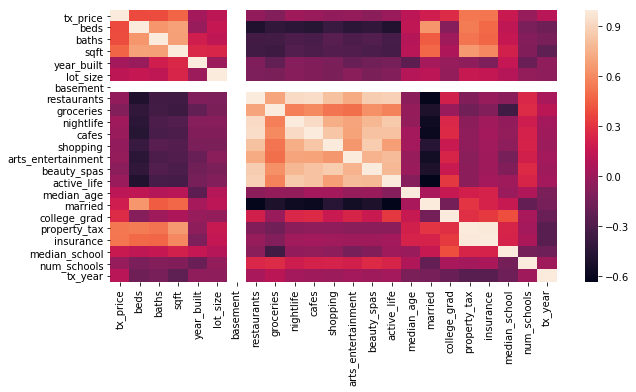

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(corelation)


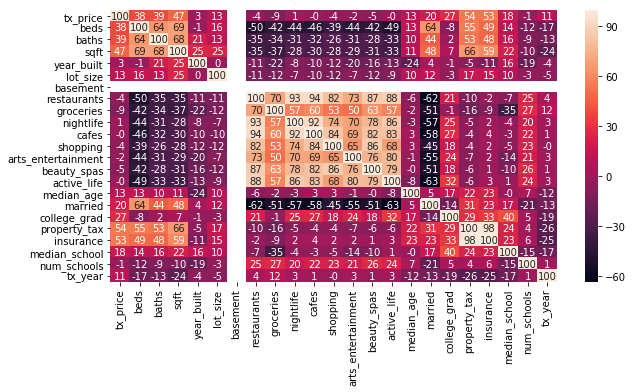

In [17]:
plt.figure(figsize=(10,5))

sns.heatmap(corelation*100,annot=True,fmt='.0f')
plt.show()

In [19]:
# Generate a mask to upper triangel

mask = np.zeros_like(corelation,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

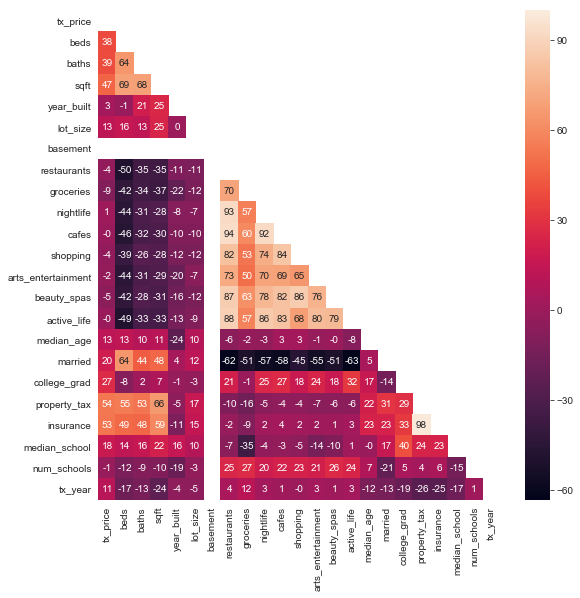

In [20]:
# Seaborn's Heatmap

plt.figure(figsize=(9,9))

# change the color scheme

sns.set_style("whitegrid")

# Ploting heat map of correlations

sns.heatmap(corelation*100,annot=True,fmt='.0f',mask = mask)
plt.show()

### Data Cleaning 

In [58]:
data.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'property_type', 'exterior_walls', 'roof', 'basement', 'restaurants',
       'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment',
       'beauty_spas', 'active_life', 'median_age', 'married', 'college_grad',
       'property_tax', 'insurance', 'median_school', 'num_schools', 'tx_year'],
      dtype='object')

In [59]:
data.shape

(1883, 26)

In [60]:
# Drop duplicates from data 
data.drop_duplicates()
data.shape

(1883, 26)

### Irrelevent information in Our data
1. the data/observations actually not fit the specific problem that we are going to solve.

### Structural Errors
Structural errors are those that arise during measurment, data transfer or "poor collection of data".


In [61]:
# Total null size in data 
data.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

In [62]:
data.basement.unique()

array([nan,  1.])

In [63]:
print(data.basement.isnull().sum())
data.basement.value_counts()
#with basement------>1657
# without basement-->226

226


1.0    1657
Name: basement, dtype: int64

In [64]:
# process of replacing missing value in basement with zero
data['basement']=data.basement.fillna(0)

In [65]:
# Now all null value converted to zero
data.basement.value_counts()

1.0    1657
0.0     226
Name: basement, dtype: int64

In [66]:
data.roof.value_counts()   

Composition Shingle      1179
Asphalt                   132
Shake Shingle              55
Other                      49
Gravel/Rock                30
Wood Shake/ Shingles       30
Roll Composition           12
Asbestos                    9
Slate                       9
asphalt                     5
Composition                 5
composition                 4
Metal                       4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

### Types and captiization

In [67]:
# How to print cetegorical feature
for i in data.dtypes[data.dtypes=='object'].index:
    print(i)

property_type
exterior_walls
roof


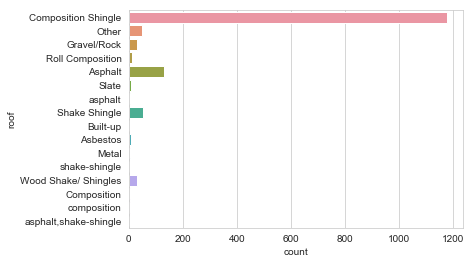

In [68]:
# count plot for the roof
sns.countplot(y='roof',data=data)

In [69]:
data.roof.unique()

array([nan, 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'asphalt', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'shake-shingle',
       'Wood Shake/ Shingles', 'Composition', 'composition',
       'asphalt,shake-shingle'], dtype=object)

In [70]:
data.roof.nunique()

16

In [71]:
# Duplicates classes

1.'Shake Shingle'='shake-shingle','asphalt,shake-shingle'
2. 'Composition'= 'composition'
3. 'Asphalt'= 'asphalt'

SyntaxError: invalid syntax (<ipython-input-71-2df94d32d2b6>, line 3)

In [72]:
# hare all starting work is capital latter that why
# Asphalt change with asphalt
data.roof.replace('Asphalt','asphalt',inplace=True)

# 'shake-shingle','asphalt,shake-shingle' change with Shake Shingle
data.roof.replace(['shake-shingle','asphalt,shake-shingle'],'Shake Shingle',inplace=True)

# 'composition' change with 'Composition'
data.roof.replace('Composition','composition',inplace=True)


In [73]:
data.roof.nunique()

12

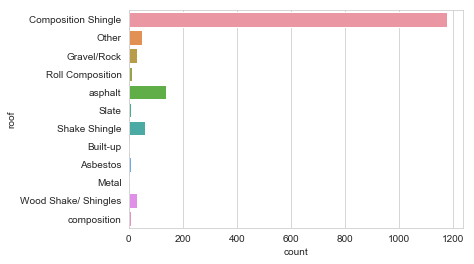

In [74]:
sns.countplot(y='roof',data=data)

In [77]:
data.dtypes[data.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [78]:
#exterior_walls
data.exterior_walls.unique()


array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', nan, 'Metal',
       'Wood Shingle', 'Masonry', 'Brick veneer', 'Other', 'Combination',
       'Asbestos shingle', 'Rock, Stone'], dtype=object)